In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Importing custom function file to se in the modeling**

In [0]:
from google.colab import files
src = list(files.upload().values())[0]
open('custom_functions.py','wb').write(src)
import custom_functions

Saving custom_functions.py to custom_functions.py


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from custom_functions import evaluate_model,make_confusion_matrix,calc_training_RMSE,calc_test_RMSE,make_roc_auc_curve,multiclass_roc_auc_score,make_learning_curve,feature_importance,accuracy_score,classification_report

### **Importing all the needed libraries**

In [3]:
# import libraries needed
from collections import Counter
import IPython
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, FunctionTransformer, LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from pathlib import Path
import matplotlib.pyplot as plt
import itertools

Using TensorFlow backend.


### **Here we made our various custom functions for evaluation paramteres, testing and training RMSE, plotting confusion matrix and ROC_auc curve etc.(Same as custom_function.py)**

In [2]:
# Modules and functions

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,f1_score

# function for evaluation parameters
def evaluate_model(y_actual, y_pred):
  ''' Return va Evaluation parameters for model
  Arguments
  ----------------
  y_actual:     Originial target feature of your dataset
  y_pred:       Predicted target feature of your dataset
  '''
  f1_score(y_actual, y_pred, average=None, labels=[0,1,2],zero_division=0)
  print(classification_report(y_actual,y_pred))
  print(confusion_matrix(y_actual,y_pred))
  acc_p = accuracy_score(y_actual,y_pred)
  print(f'Accuracy of Model is {acc_p}')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# function to calculate training RMSE
from sklearn.metrics import mean_squared_error
def calc_training_RMSE(X_train, y_train, model):
    '''returns the accuracy score and RMSE for trainig data 
    Arguments
    -----------------
    X_train:    Training dataset of your data
    y_train:    Trainig target feature of your data
    model:      Model after you are done with fitting
    '''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    print("Accuracy and RMSE for training data is:")
    return model.score(X_train, y_train), rmse

# function to calculate testing RMSE 
def calc_test_RMSE(X_test, y_test, model):
    '''returns the score and RMSE for trainig data
    Arguments
    -----------------
    X_train:    Training dataset of your data
    y_train:    Trainig target feature of your data
    model:      Model after you are done with fitting
    '''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print("Accuracy and RMSE for test data is:")
    return model.score(X_test, y_test), rmse

# function for plotting ROC_AUC_CURVE for binary class classification
def make_roc_auc_curve(y_test,fit_model,model_name):
  '''plot roc_auc_curve for any model(binary_classification)
  Arguments
  -------------
  y_test = test data set of your data
  fit_model = the model after you are done with fitting data
  model_name = this is for the title of your graph for your model
  '''
  from sklearn.metrics import roc_auc_score
  # generate a no readmossion prediction (majority class)
  ns_probs = [0 for _ in range(len(y_test,))]

  # predict probabilities
  lr_probs = fit_model.predict_proba(y_test)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print(f'No Readmission: ROC AUC=%.3f' % (ns_auc))
  print(f'{model_name}: ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Readmission')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label= model_name)
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()
# function for ploting all socres in one figure
def make_confusion_matrix(cf,
                          y_true,
                          y_pred,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix with all important evaluation parameters
     using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    y_true:        your original target feature
    y_pred:        your predicted target feature
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = (np.trace(cf) / float(np.sum(cf))) * 100

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = precision_score(y_true,y_pred) * 100
            recall    = recall_score(y_true,y_pred) * 100
            f1_score  = 2*precision*recall / (precision + recall)
            roc_auc = roc_auc_score(y_true,y_pred) * 100
            stats_text = "\n\nAccuracy={:0.2f}%\nPrecision={:0.2f}%\nRecall={:0.2f}%\nF1 Score={:0.2f}%\nROC_AUC Score={:0.2f}%".format(
                accuracy,precision,recall,f1_score,roc_auc)
        else:
          #matrics for Multiclass classification
         
          precision = precision_score(y_true,y_pred, average='weighted') * 100
          recall = recall_score(y_true,y_pred, average='weighted') * 100
          f1_score = f1_score(y_true, y_pred, average='weighted') *100
          roc_auc = multiclass_roc_auc_score(y_true,y_pred) * 100
          stats_text = "\n\nAccuracy={:0.2f}%\nPrecision={:0.2f}%\nRecall={:0.2f}%\nF1 Score={:0.2f}%\nROC-AUC Score={:0.2f}%".format(
                accuracy,precision,recall,f1_score,roc_auc)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
  
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  '''
  This function will calculate roc_auc_score for multiclass classification
  Arguments
  ----------------------
  y_test:   test dataset of your data
  y_pred:   predicted target feature of your data 
  '''
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

#function for feature importance 
def feature_importance(fit_model,X_train,num_features, title=None):
    '''
    This function will plot the feature importance graph and returns the desired number of top score features
    Arguments
    -------------
    fit_model:    The model after you are done with fitting the data
    X_train:      Train dataset of your data
    num_features: The number of features you want to get 
    title:        Title of the figure
                  default:None otherwise it will print the given title
    '''
    importances = fit_model.feature_importances_

    # make importance relative to the max importance
    feature_importance = 100.0 * (importances / importances.max())
    sorted_idx = np.argsort(feature_importance)
    feature_names = list(X_train.columns.values)
    feature_names_sort = [feature_names[indice] for indice in sorted_idx]
    pos = np.arange(sorted_idx.shape[0]) + 15.0
    print (f'Top {num_features} features are: ')
    top = []
    for feature in feature_names_sort[::-1][:num_features]:
        print (feature)
        top.append(feature)
    # plot the result
    fig,ax = plt.subplots(figsize=(50,80))
    plt.barh(pos, feature_importance[sorted_idx], align='center', )
    plt.xticks(np.arange(0, 101, 10)) 
    plt.yticks(pos, feature_names_sort, fontsize=20)
    ax.tick_params( width=5, colors='r',
                  grid_color='r', grid_alpha=0.5, labelsize = 'large')
    if title:
      plt.title('Relative Feature Importance : ' + title, fontsize=40)
    plt.show()
    return top


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient-cbrt,number_emergency-cbrt,number_inpatient-cbrt,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,level1_diag1,level1_diag2,level1_diag3,total_visits-cbrt,diag_ch,num_medications_per_day,num_procedures_per_day,num_lab_procedures_per_day,number_diagnoses_per_day,...,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_2,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,medi_spec_Emergency/Trauma,medi_spec_Family/GeneralPractice,medi_spec_Gastroenterology,medi_spec_InternalMedicine,medi_spec_Nephrology,medi_spec_ObstetricsandGynecology,medi_spec_Orthopedics,medi_spec_Orthopedics-Reconstructive,medi_spec_Psychiatry,medi_spec_Pulmonology,medi_spec_Radiologist,medi_spec_Surgery-Cardiovascular/Thoracic,medi_spec_Surgery-General,medi_spec_Unknown,medi_spec_Urology,medi_spec_others,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,change_1,diabetesMed_1,A1Cresult_0,A1Cresult_1,max_glu_serum_0,max_glu_serum_1
age,1.000000,0.108191,0.017879,-0.029493,0.042461,0.028679,-0.090839,-0.014722,0.242691,-0.054463,0.051156,0.017817,0.014178,0.040071,0.001817,0.058103,0.081222,0.010489,0.014869,0.005316,0.008209,0.011845,-0.001430,0.005318,-0.088322,-0.001284,0.002154,-0.000165,0.002570,-0.000165,0.034746,0.036707,0.081826,0.073310,-0.015464,-0.051011,-0.067603,-0.046580,-0.103111,-0.018009,...,-0.004437,0.001817,0.001168,-0.030158,0.004578,0.003971,0.003298,0.003835,0.059164,0.011989,0.014045,-0.007803,0.023801,0.024993,-0.006537,0.003072,0.022809,-0.025842,-0.127895,0.005401,0.007082,-0.063985,-0.000286,0.006404,-0.007957,-0.005313,0.047063,0.000236,-0.097491,0.001299,0.169533,-0.063431,-0.012268,-0.050733,0.034388,-0.019787,-0.016916,-0.125399,0.041548,0.011332
time_in_hospital,0.108191,1.000000,0.319768,0.189960,0.464103,-0.015946,-0.007960,0.087078,0.220954,-0.006541,0.033737,0.005756,0.002294,0.014544,0.010211,0.016094,0.024706,0.002277,0.005053,0.005218,0.006100,0.001759,0.003577,-0.003095,0.098703,-0.002294,-0.000608,-0.002539,-0.000585,0.001711,0.043000,-0.124230,0.090843,0.115552,0.045597,-0.006523,-0.561959,-0.297002,-0.562098,-0.693932,...,-0.002839,-0.001476,-0.002088,0.009097,0.020651,0.002420,0.006173,0.086711,0.046067,0.002111,-0.002915,0.004982,-0.022502,-0.002867,-0.002425,0.003444,0.026325,0.027296,-0.035674,-0.016532,-0.017868,0.062577,0.025626,-0.032997,0.037397,0.009004,0.001968,-0.027491,0.015331,-0.011580,-0.005822,-0.016063,-0.006772,-0.030509,-0.107590,0.060849,0.040711,0.049647,-0.022032,0.034583
num_lab_procedures,0.017879,0.319768,1.000000,0.051754,0.265151,-0.019015,0.002765,0.043057,0.149978,-0.045878,0.012976,-0.006542,-0.002433,0.000123,0.004036,0.015440,0.000013,0.001553,-0.012837,-0.009184,0.000223,-0.004100,0.003829,-0.000459,0.093484,-0.010632,-0.007518,-0.000796,0.001266,-0.003213,0.042950,-0.061362,0.037847,0.063974,0.016982,0.011116,-0.185949,-0.160548,0.303032,-0.257390,...,-0.008530,-0.006756,0.005252,-0.010518,-0.007037,0.002633,-0.005626,-0.037595,0.018320,0.056808,0.242498,-0.004540,-0.132369,-0.009165,-0.002542,-0.015656,0.135154,0.001916,-0.043455,-0.083902,-0.056523,-0.018827,0.031423,-0.066043,0.027265,-0.046035,0.009706,-0.052807,-0.064795,-0.007922,-0.023536,-0.001614,0.007973,-0.003050,-0.065344,0.034319,0.129257,0.213155,-0.137196,-0.089979
num_procedures,-0.029493,0.189960,0.051754,1.000000,0.381564,-0.033072,-0.051676,-0.076577,0.069718,-0.038336,0.003684,-0.003956,0.007439,0.010809,0.004961,0.005724,0.007890,-0.000384,0.014179,0.015313,-0.0

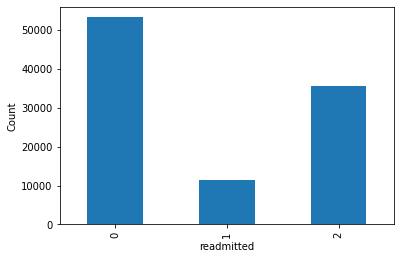

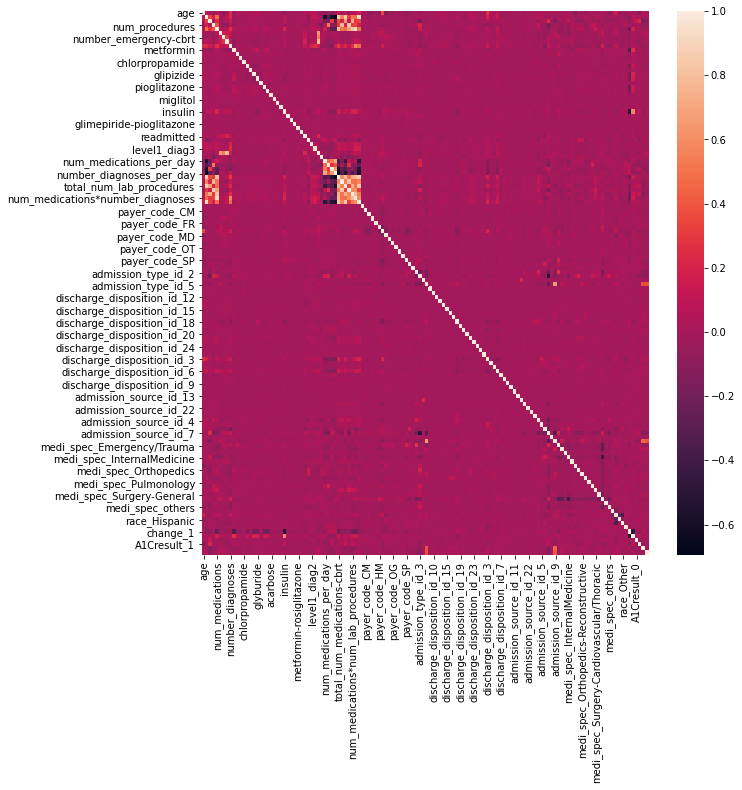

In [0]:
# load original data (Standard Scaler method) into dataframe and check shape
# db_data_pro = pd.read_csv('db_data_copy_complete_processed.csv')
# print(db_data_pro.shape)

# read the unscaled data
db_data_unscaled = pd.read_csv('/content/drive/My Drive/db_data_processed_wo_scaling.csv')
db_data_unscaled.drop(['patient_nbr','encounter_id'],axis =1,inplace=True)
#appying min max scaler
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler
num_cols = ['age','num_lab_procedures','num_medications',
            'num_lab_procedures_per_day','num_medications_per_day',
            'num_procedures_per_day','number_diagnoses','number_diagnoses_per_day',
            'total_num_lab_procedures','num_medications*num_procedures',
           'num_medications*num_lab_procedures','num_medications*number_diagnoses',
            'total_number_diagnoses']
features = db_data_unscaled[num_cols]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
db_data_unscaled[num_cols] = features

#save the min max- scaling data
db_data_unscaled.to_csv('db_data_minmax.csv')
# examine the data types and descriptive stats
#print(db_data_pro.info())
# print(db_data_pro.describe())
db_data_pro = db_data_unscaled.iloc[:,1:]
db_data_pro.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

# Finding correlation
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(db_data_pro.corr())
db_data_pro.corr()

In [0]:
db_data_pro.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient-cbrt,number_emergency-cbrt,number_inpatient-cbrt,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,level1_diag1,level1_diag2,level1_diag3,total_visits-cbrt,diag_ch,num_medications_per_day,num_procedures_per_day,num_lab_procedures_per_day,number_diagnoses_per_day,...,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_2,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,medi_spec_Emergency/Trauma,medi_spec_Family/GeneralPractice,medi_spec_Gastroenterology,medi_spec_InternalMedicine,medi_spec_Nephrology,medi_spec_ObstetricsandGynecology,medi_spec_Orthopedics,medi_spec_Orthopedics-Reconstructive,medi_spec_Psychiatry,medi_spec_Pulmonology,medi_spec_Radiologist,medi_spec_Surgery-Cardiovascular/Thoracic,medi_spec_Surgery-General,medi_spec_Unknown,medi_spec_Urology,medi_spec_others,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,change_1,diabetesMed_1,A1Cresult_0,A1Cresult_1,max_glu_serum_0,max_glu_serum_1
0,0.000000,1,0.305344,0,0.0000,0.793701,0.793701,0.793701,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8,0.0,0.0,0.793701,1.0,0.023810,0.000000,0.445652,0.0625,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0.111111,3,0.442748,0,0.2125,1.144714,0.793701,0.793701,0.533333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,3.0,3.0,3.0,1.144714,0.0,0.142857,0.000000,0.206522,0.1875,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0.222222,2,0.076336,5,0.1500,1.357209,0.793701,1.144714,0.333333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0.0,0.0,1.518294,1.0,0.142857,0.333333,0.054348,0.1875,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0.333333,2,0.328244,1,0.1875,0.793701,0.793701,0.793701,0.400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,3.4,7.0,0.793701,3.0,0.190476,0.000000,0.239130,0.1875,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0.444444,1,0.381679,0,0.0875,0.793701,0.793701,0.793701,0.266667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,2.0,0.0,0.793701,1.0,0.190476,0.000000,0.554348,0.3125,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [0]:
db_data_pro['readmitted'].replace(2,0, inplace=True)

In [0]:
#oversampling
from collections import Counter
from imblearn.over_sampling import SMOTE
#from matplotlib import pyplot
#from numpy import where
# define dataset
X_sm_b  = db_data_pro.loc[:, db_data_pro.columns!='readmitted'].values
X_cols_b = db_data_pro.loc[:, db_data_pro.columns!='readmitted'].columns.tolist()
y_sm_b = db_data_pro['readmitted'].values.ravel()
# summarize class distribution
counter = Counter(y_sm_b)
print(counter)
# transform the dataset
oversample = SMOTE(random_state=42)
X_sm_b, y_sm_b = oversample.fit_resample(X_sm_b, y_sm_b)
# summarize the new class distribution
counter = Counter(y_sm_b)
print(counter)

X_sm_b, y_sm_b = pd.DataFrame(X_sm_b), pd.DataFrame(y_sm_b)
for i in range(len(X_cols_b)):
  X_sm_b = X_sm_b.rename(columns={i:X_cols_b[i]})
y_sm_b = y_sm_b.rename(columns={0:'readmitted'})

Counter({0: 88763, 1: 11357})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 88763, 1: 88763})


In [0]:
X_sm_b.to_csv('/content/drive/My Drive/X_sm_sampled_b_new.csv')
y_sm_b.to_csv('/content/drive/My Drive/y_sm_sampled_b_new.csv')



In [0]:
X_sm_b = pd.read_csv('/content/drive/My Drive/X_sm_sampled_b_new.csv')
y_sm_b = pd.read_csv('/content/drive/My Drive/y_sm_sampled_b_new.csv')
X_sm_b = X_sm_b.iloc[:,1:]
y_sm_b = y_sm_b.iloc[:,1:]
y_sm_b = y_sm_b.values.ravel()


In [0]:
X_sm_b.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient-cbrt,number_emergency-cbrt,number_inpatient-cbrt,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,level1_diag1,level1_diag2,level1_diag3,total_visits-cbrt,diag_ch,num_medications_per_day,num_procedures_per_day,num_lab_procedures_per_day,number_diagnoses_per_day,total_num_medications-cbrt,...,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_2,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,medi_spec_Emergency/Trauma,medi_spec_Family/GeneralPractice,medi_spec_Gastroenterology,medi_spec_InternalMedicine,medi_spec_Nephrology,medi_spec_ObstetricsandGynecology,medi_spec_Orthopedics,medi_spec_Orthopedics-Reconstructive,medi_spec_Psychiatry,medi_spec_Pulmonology,medi_spec_Radiologist,medi_spec_Surgery-Cardiovascular/Thoracic,medi_spec_Surgery-General,medi_spec_Unknown,medi_spec_Urology,medi_spec_others,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,change_1,diabetesMed_1,A1Cresult_0,A1Cresult_1,max_glu_serum_0,max_glu_serum_1
0,0.000000,1.0,0.305344,0.0,0.0000,0.793701,0.793701,0.793701,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.793701,1.0,0.023810,0.000000,0.445652,0.0625,1.144714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,3.0,0.442748,0.0,0.2125,1.144714,0.793701,0.793701,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,1.144714,0.0,0.142857,0.000000,0.206522,0.1875,3.791393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.222222,2.0,0.076336,5.0,0.1500,1.357209,0.793701,1.144714,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.518294,1.0,0.142857,0.333333,0.054348,0.1875,2.981366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.333333,2.0,0.328244,1.0,0.1875,0.793701,0.793701,0.793701,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.4,7.0,0.793701,3.0,0.190476,0.000000,0.239130,0.1875,3.191252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.444444,1.0,0.381679,0.0,0.0875,0.793701,0.793701,0.793701,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.793701,1.0,0.190476,0.000000,0.554348,0.3125,2.040828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
#TRAIN-TEST-VAL split for under and over sampled data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b, y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)

(123735, 131) (26629, 131) (27162, 131) (27162,) (123735,) (26629,)


RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.94      0.93      0.93     27162
weighted avg       0.94      0.93      0.93     27162

[[13537    17]
 [ 1796 11812]]
Accuracy of Model is 0.9332523378249025
Accuracy and RMSE for training data is:
Training score,RMSE of model is: (0.9366872752252798, 0.2516201994568802)
Accuracy and RMSE for test data is:
Test score,RMSE of is: (0.9332523378249025, 0.25835568926404073)


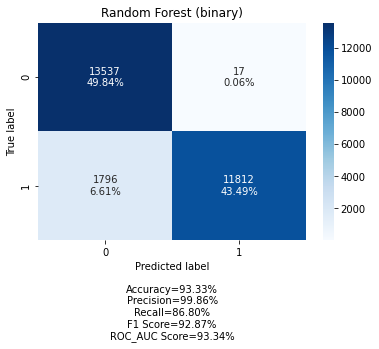

In [6]:
# RandomeForest Classifier for over and under sampled data
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=500, max_features=9,
                             min_samples_leaf=10)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
cnf_rfc_b = confusion_matrix(y_val_b,pred_rfc_b)  
make_confusion_matrix(cnf_rfc_b,y_val_b,pred_rfc_b, title='Random Forest (binary)')
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


(0.0, 40.0)

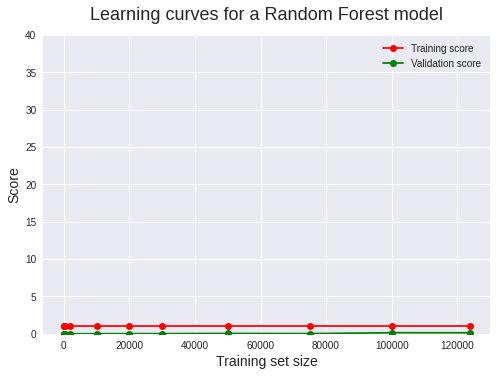

In [0]:
import warnings
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 10000, 20000, 30000, 50000, 75000, 100000, 123735]
estimator = RandomForestClassifier(n_estimators=500)
X = X_sm_b 
y = y_sm_b 
cv = 5
n_jobs = -1
# train_scores_mean = train_scores.mean(axis = 1)
# validation_scores_mean = validation_scores.mean(axis = 1)

train_sizes, train_scores, validation_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_mean = np.std(validation_scores, axis=1)
# fit_times_mean = np.mean(fit_times, axis=1)
# fit_times_std = np.std(fit_times, axis=1)

    # # Plot learning curve
    # axes[0].grid()
    # axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
    #                      train_scores_mean + train_scores_std, alpha=0.1,
    #                      color="r")
    # axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1,
    #                      color="g")
    # axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
    #              label="Training score")
    # axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
    #              label="Cross-validation score")
    # axes[0].legend(loc="best")
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean,'o-', color="r", label = 'Training score')
plt.plot(train_sizes, validation_scores_mean,'o-', color="g", label = 'Validation score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

Top 15 features are: 
number_inpatient-cbrt
total_visits-cbrt
insulin
medi_spec_Unknown
admission_source_id_7
gender_1
race_Caucasian
change_1
payer_code_MC
metformin
age
diabetesMed_1
number_diagnoses
number_emergency-cbrt
number_outpatient-cbrt


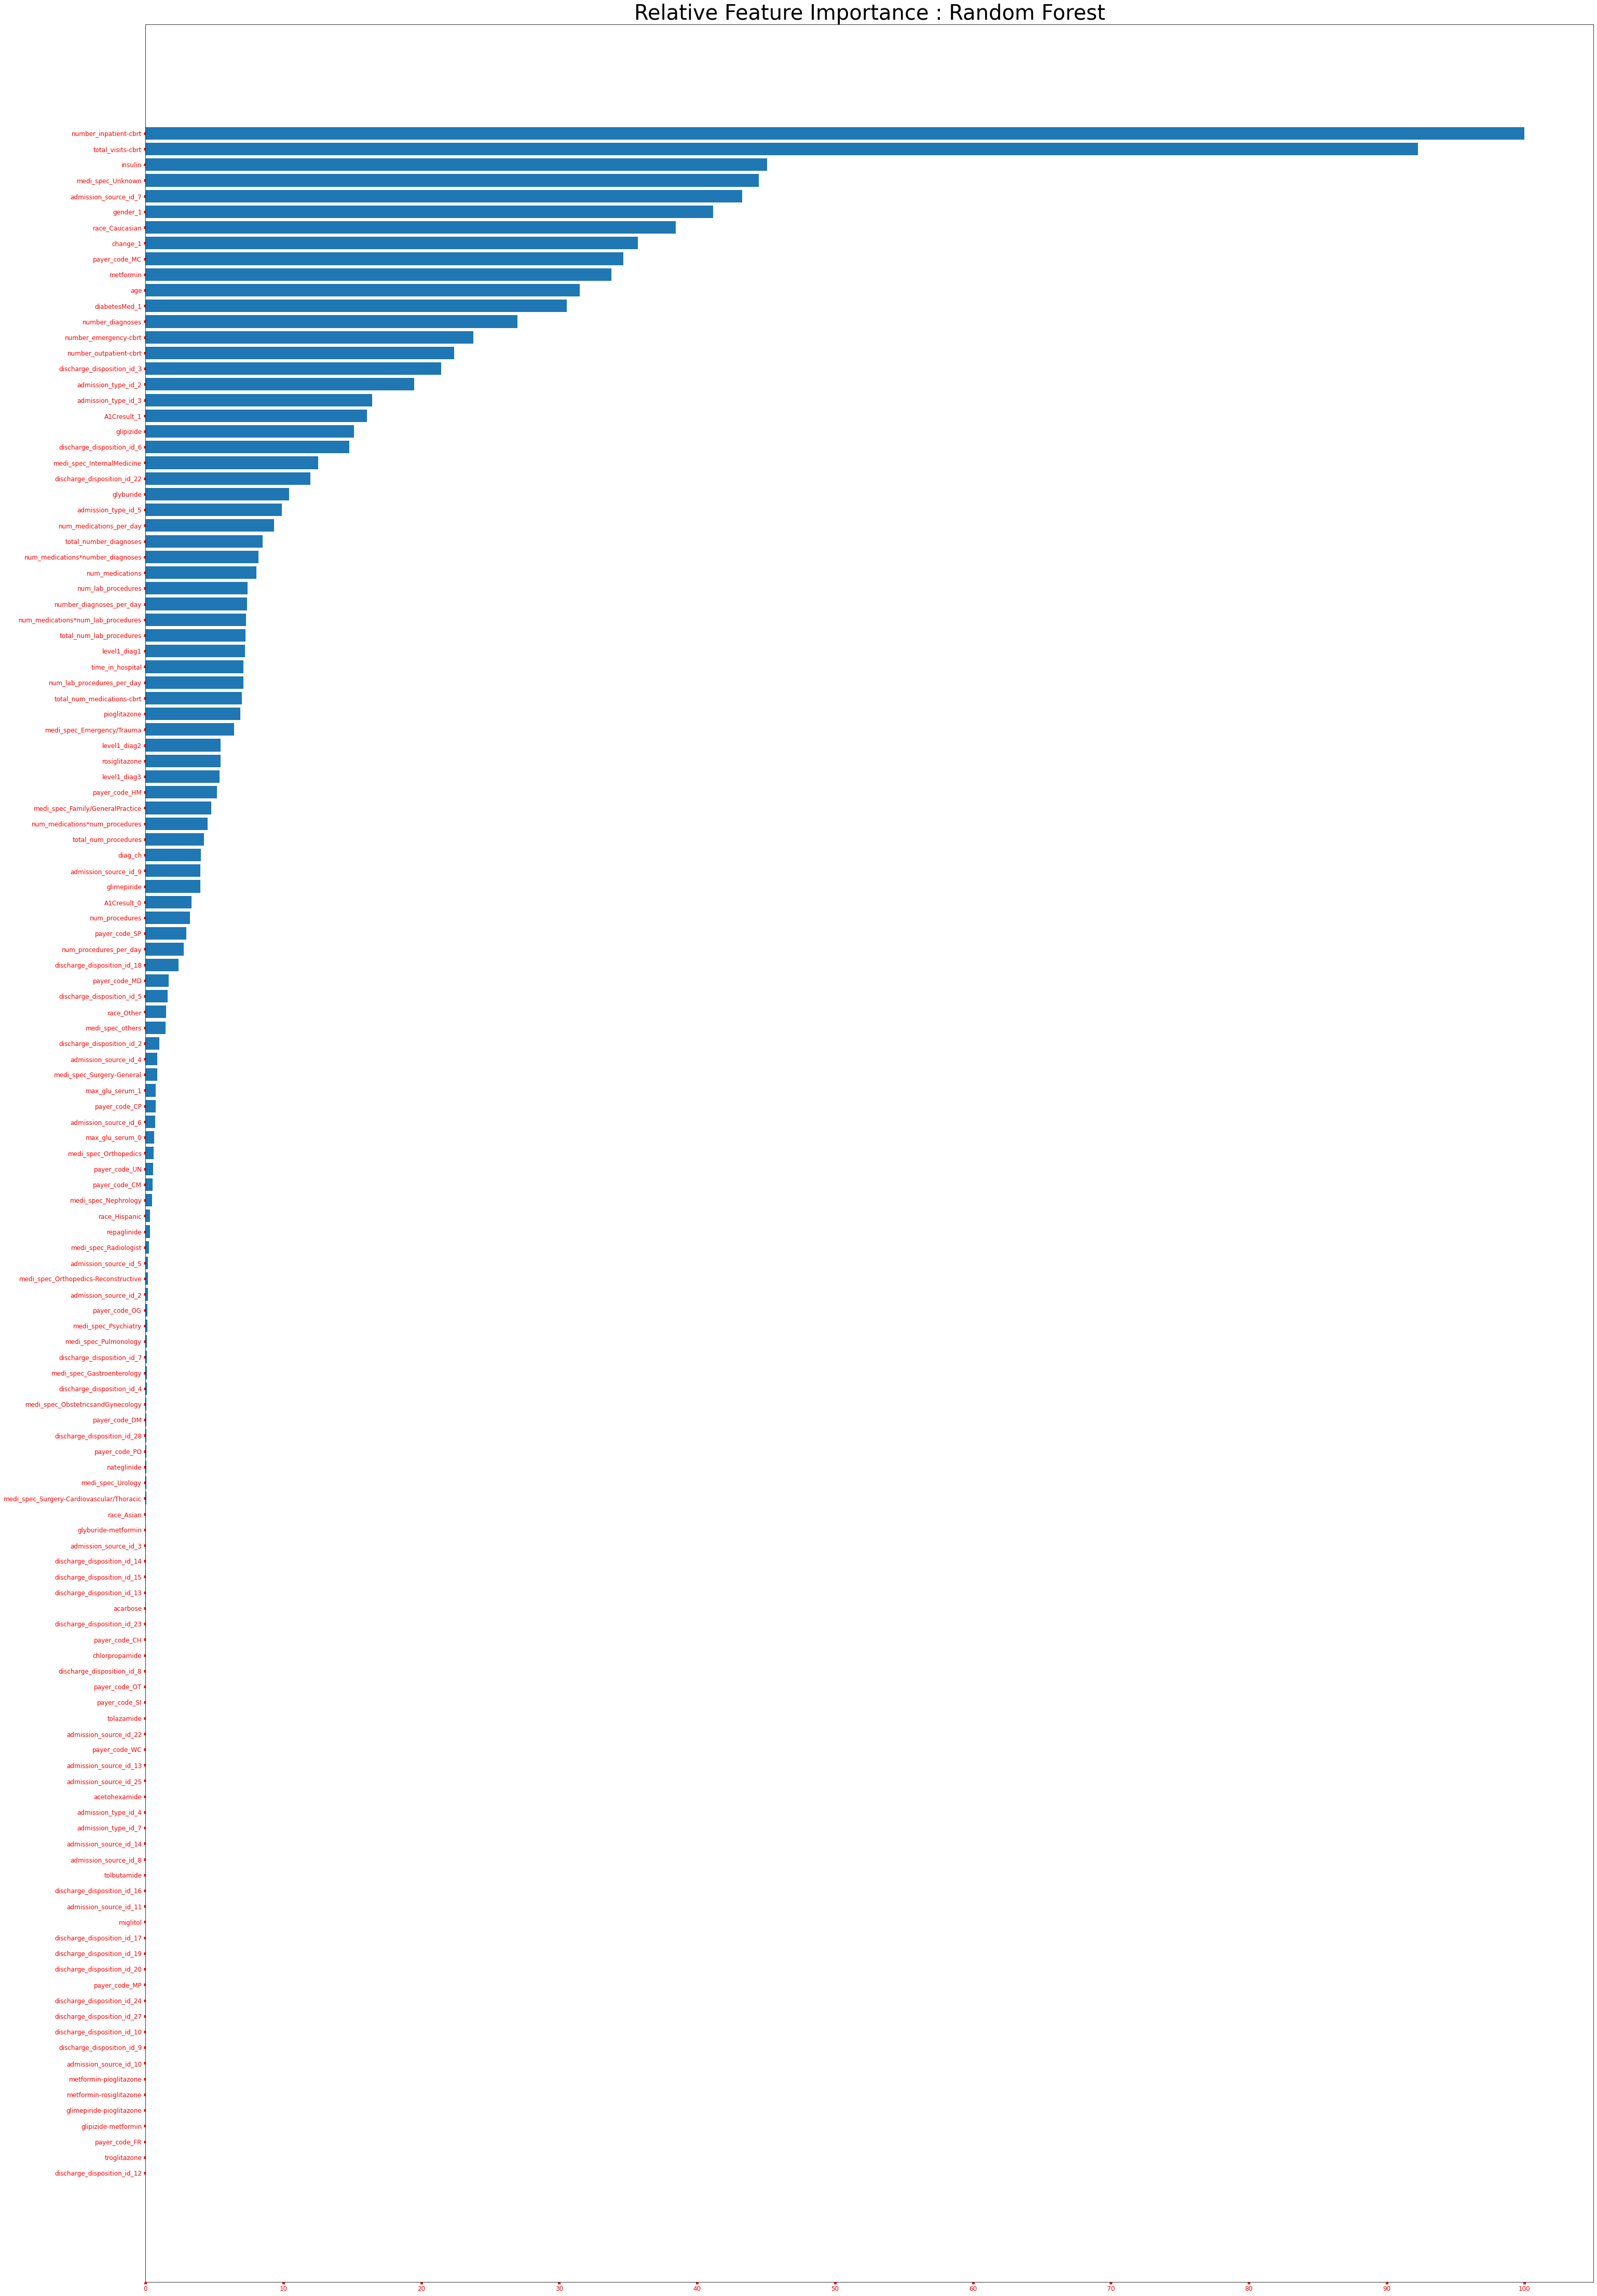

In [0]:
top = feature_importance(re_rfc_b,X_train_b,15,title="Random Forest")

In [0]:
top12 = ['total_visits-cbrt', 'number_inpatient-cbrt', 'insulin','change_1','gender_1','diabetesMed_1',
         'admission_source_id_7','race_Caucasian','metformin','diag_ch','admission_type_id_3','discharge_disposition_id_3']

In [0]:
#TRAIN-TEST-VAL split for under and over sampled data
#y_sm_b = y_sm_b.values.ravel()
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b[top12], y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)

(123735, 12) (26629, 12) (27162, 12) (27162,) (123735,) (26629,)


RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     13554
           1       1.00      0.85      0.92     13608

    accuracy                           0.93     27162
   macro avg       0.93      0.93      0.93     27162
weighted avg       0.93      0.93      0.92     27162

[[13514    40]
 [ 1987 11621]]
Accuracy of Model is 0.925373683822988
Accuracy and RMSE for training data is:
Training score,RMSE of model is: (0.9267951670909605, 0.2705639164948635)
Accuracy and RMSE for test data is:
Test score,RMSE of is: (0.925373683822988, 0.2731781766119175)


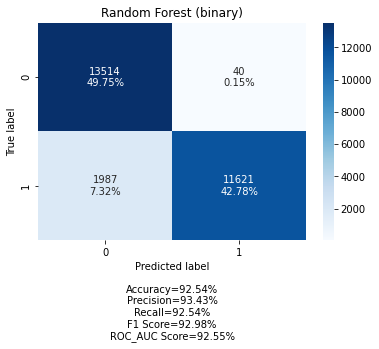

In [0]:
# RandomeForest Classifier for over and under sampled data
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=500,
                             min_samples_leaf=10)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
cnf_rfc_b = confusion_matrix(y_val_b,pred_rfc_b)  
make_confusion_matrix(cnf_rfc_b,y_val_b,pred_rfc_b, title='Random Forest (binary)')
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')


### **Read the processed data for modeling**

Text(0, 0.5, 'Count')

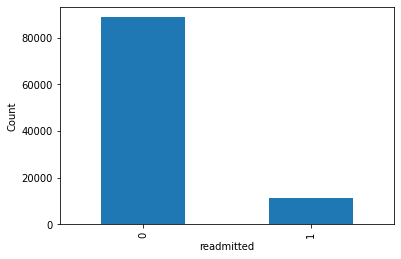

In [0]:
# Code for Binary classification
db_data_pro = pd.read_csv('/content/drive/My Drive/db_data_minmax.csv')
db_data_pro = db_data_pro.iloc[:,1:]
db_data_pro['readmitted'].replace(2,0, inplace=True)
# plot the target feature distribution
db_data_pro.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

### **Used one model for unbalanced data**

In [0]:
# Trying one model on this unbalanced data
X = db_data_pro.loc[:, db_data_pro.columns!='readmitted']
y = db_data_pro['readmitted']
y = y.values.ravel()


In [0]:
# SPlit the data in train test and validation
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)


In [0]:
#Random Forest with unbalanced data
print('RANDOM FOREST WITH Unbalanced data:')
re_rfc_b = RandomForestClassifier(n_estimators=100)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
cnf_rfc_b = confusion_matrix(y_val_b,pred_rfc_b)  
make_confusion_matrix(cnf_rfc_b,y_val_b,pred_rfc_b, title='Random Forest (binary)')
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')


### **Used Undersamoling of major class and then oversampling of minority class(Approach - 1)**

In [0]:
#oversampling and under sampling

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X = db_data_pro.loc[:, db_data_pro.columns!='readmitted']
X_ou_cols = db_data_pro.loc[:, db_data_pro.columns!='readmitted'].columns.tolist()
y = db_data_pro['readmitted']
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over_dic  = {1:70000}
under_dic  = {0:70000}
over = SMOTE(random_state=42, sampling_strategy=over_dic)
under = RandomUnderSampler(random_state=42, sampling_strategy=under_dic)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 88763, 1: 11357})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 70000, 1: 70000})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:

X, y = pd.DataFrame(X), pd.DataFrame(y)
for i in range(len(X_ou_cols)):
  X = X.rename(columns={i:X_ou_cols[i]})
y = y.rename(columns={0:'readmitted'})
X = X.iloc[:,1:]

In [0]:
# plot the target feature distribution
y_sm_b.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
#TRAIN-TEST-VAL split for under and over sampled data
y = y.values.ravel()
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)

RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10674
           1       1.00      0.84      0.91     10746

    accuracy                           0.92     21420
   macro avg       0.93      0.92      0.92     21420
weighted avg       0.93      0.92      0.92     21420

[[10671     3]
 [ 1742  9004]]
Accuracy of Model is 0.9185340802987861
Training score,RMSE of model is: (0.9197171551547448, 0.28334227507602033)
Test score,RMSE of is: (0.9185340802987861, 0.2854223531912205)


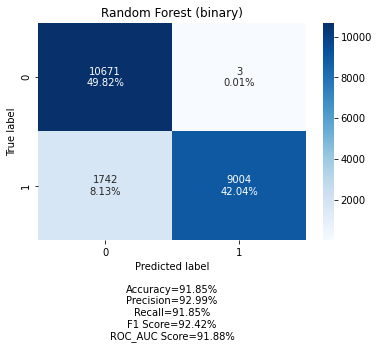

In [0]:
# RandomeForest Classifier for over and under sampled data
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=500, max_features=9,
                             min_samples_leaf=10)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
cnf_rfc_b = confusion_matrix(y_val_b,pred_rfc_b)  
make_confusion_matrix(cnf_rfc_b,y_val_b,pred_rfc_b, title='Random Forest (binary)')
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')


### **Used Only oversampling technique (SMOTE) to increase the accuracy of the model(Approach -2)**

In [0]:
#oversampling
from collections import Counter
from imblearn.over_sampling import SMOTE
#from matplotlib import pyplot
#from numpy import where
# define dataset
X_sm_b  = db_data_pro.loc[:, db_data_pro.columns!='readmitted'].values
X_cols_b = db_data_pro.loc[:, db_data_pro.columns!='readmitted'].columns.tolist()
y_sm_b = db_data_pro['readmitted'].values.ravel()
# summarize class distribution
counter = Counter(y_sm_b)
print(counter)
# transform the dataset
oversample = SMOTE(random_state=42)
X_sm_b, y_sm_b = oversample.fit_resample(X_sm_b, y_sm_b)
# summarize the new class distribution
counter = Counter(y_sm_b)
print(counter)

X_sm_b, y_sm_b = pd.DataFrame(X_sm_b), pd.DataFrame(y_sm_b)
for i in range(len(X_cols_b)):
  X_sm_b = X_sm_b.rename(columns={i:X_cols_b[i]})
y_sm_b = y_sm_b.rename(columns={0:'readmitted'})
X_sm_b = X_sm_b.iloc[:,1:]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 88763, 1: 11357})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 88763, 1: 88763})


Text(0, 0.5, 'Count')

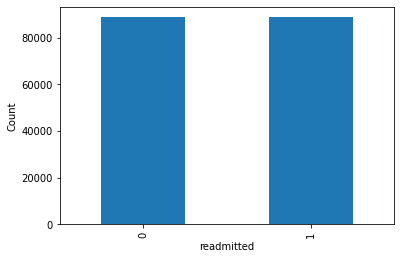

In [0]:
# plot the target feature distribution
y_sm_b.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
X_sm_b.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient-cbrt,number_emergency-cbrt,number_inpatient-cbrt,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,level1_diag1,level1_diag2,level1_diag3,total_visits-cbrt,diag_ch,num_medications_per_day,num_procedures_per_day,num_lab_procedures_per_day,number_diagnoses_per_day,total_num_medications-cbrt,...,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_2,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,medi_spec_Emergency/Trauma,medi_spec_Family/GeneralPractice,medi_spec_Gastroenterology,medi_spec_InternalMedicine,medi_spec_Nephrology,medi_spec_ObstetricsandGynecology,medi_spec_Orthopedics,medi_spec_Orthopedics-Reconstructive,medi_spec_Psychiatry,medi_spec_Pulmonology,medi_spec_Radiologist,medi_spec_Surgery-Cardiovascular/Thoracic,medi_spec_Surgery-General,medi_spec_Unknown,medi_spec_Urology,medi_spec_others,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,change_1,diabetesMed_1,A1Cresult_0,A1Cresult_1,max_glu_serum_0,max_glu_serum_1
0,0.000000,0.000000,0.305344,0.000000,0.0000,0.793701,0.793701,0.793701,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.793701,1.0,0.023810,0.000000,0.445652,0.0625,1.144714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.153846,0.442748,0.000000,0.2125,1.144714,0.793701,0.793701,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,1.144714,0.0,0.142857,0.000000,0.206522,0.1875,3.791393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.222222,0.076923,0.076336,0.833333,0.1500,1.357209,0.793701,1.144714,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.518294,1.0,0.142857,0.333333,0.054348,0.1875,2.981366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.333333,0.076923,0.328244,0.166667,0.1875,0.793701,0.793701,0.793701,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.4,7.0,0.793701,3.0,0.190476,0.000000,0.239130,0.1875,3.191252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.444444,0.000000,0.381679,0.000000,0.0875,0.793701,0.793701,0.793701,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.793701,1.0,0.190476,0.000000,0.554348,0.3125,2.040828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
y_sm_b.head()

,readmitted
0,0
1,0
2,0
3,0
4,0


In [0]:
X_sm_b.to_csv('X_sm_sampled_b.csv')
y_sm_b.to_csv('y_sm_sampled_b.csv')



In [0]:
X_sm_b = pd.read_csv('/content/drive/My Drive/X_sm_sampled_b.csv')
y_sm_b = pd.read_csv('/content/drive/My Drive/y_sm_sampled_b.csv')
X_sm_b = X_sm_b.iloc[:,1:]
y_sm_b = y_sm_b.iloc[:,1:]
y_sm_b = y_sm_b.values.ravel()


In [0]:
y_sm_b

array([0, 0, 0, ..., 1, 1, 1])

### **Used one model on this data to check the accuracy**

In [0]:
# TRAIN-TEST-VAL split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b, y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)

(123735, 131) (26629, 131) (27162, 131) (27162,) (123735,) (26629,)


RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.94      0.94      0.93     27162
weighted avg       0.94      0.93      0.93     27162

[[13553     1]
 [ 1765 11843]]
Accuracy of Model is 0.9349826964141079
Training score,RMSE of model is: (0.9355639067361701, 0.2538426545398349)
Test score,RMSE of is: (0.9349826964141079, 0.25498490854537265)


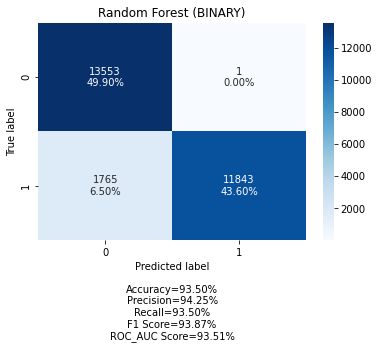

In [0]:
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=500, max_features=7,
                             min_samples_leaf=8)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')

conf_rfc_b = confusion_matrix(y_val_b, pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_val_b,pred_rfc_b,title='Random Forest (BINARY)')

Top 15 features are: 
number_inpatient-cbrt
total_visits-cbrt
insulin
change_1
diabetesMed_1
gender_1
num_procedures
admission_source_id_7
medi_spec_Unknown
race_Caucasian
metformin
diag_ch
total_num_procedures
time_in_hospital
admission_type_id_3


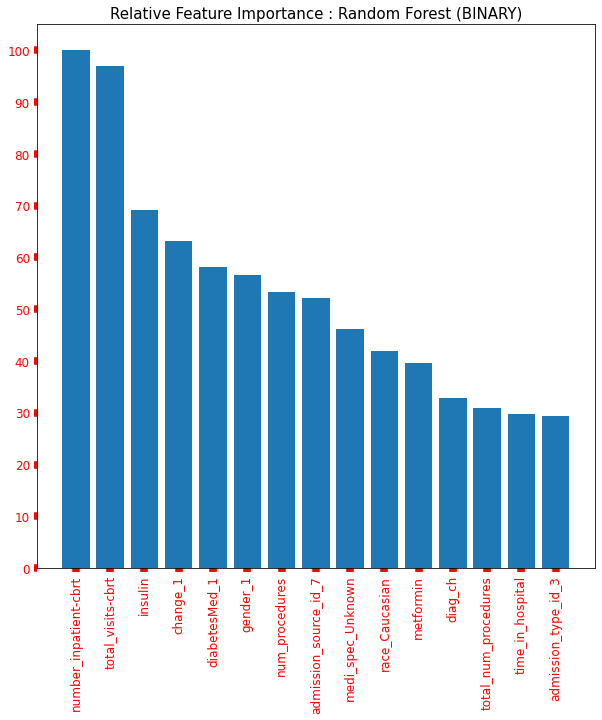

In [0]:
top = feature_importance(re_rfc_b,X_train_b,15,title='Random Forest (BINARY)')

### **After seeing the results and plot of feature importance we can remove payer_code and medical_specialty columns**

In [0]:
# Getting payer_code and medical_speciality columns
payer_code_cols = [col for col in X_sm_b.columns if 'payer' in col]
medical_spec_cols = [col for col in X_sm_b.columns if 'medi_' in col]

In [0]:
payer_code_cols

['payer_code_CH',
 'payer_code_CM',
 'payer_code_CP',
 'payer_code_DM',
 'payer_code_FR',
 'payer_code_HM',
 'payer_code_MC',
 'payer_code_MD',
 'payer_code_MP',
 'payer_code_OG',
 'payer_code_OT',
 'payer_code_PO',
 'payer_code_SI',
 'payer_code_SP',
 'payer_code_UN',
 'payer_code_WC']

In [0]:
medical_spec_cols

['medi_spec_Emergency/Trauma',
 'medi_spec_Family/GeneralPractice',
 'medi_spec_Gastroenterology',
 'medi_spec_InternalMedicine',
 'medi_spec_Nephrology',
 'medi_spec_ObstetricsandGynecology',
 'medi_spec_Orthopedics',
 'medi_spec_Orthopedics-Reconstructive',
 'medi_spec_Psychiatry',
 'medi_spec_Pulmonology',
 'medi_spec_Radiologist',
 'medi_spec_Surgery-Cardiovascular/Thoracic',
 'medi_spec_Surgery-General',
 'medi_spec_Unknown',
 'medi_spec_Urology',
 'medi_spec_others']

In [0]:
# Dropping these columns and check the accuracy of the model
X_sm_b.drop(payer_code_cols, axis=1, inplace=True)
X_sm_b.drop(medical_spec_cols, axis=1, inplace=True)

In [0]:
#TRAIN-TEST-VAL split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b, y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)


(123735, 99) (26629, 99) (27162, 99) (27162,) (123735,) (26629,)


RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.94     27162
   macro avg       0.94      0.94      0.94     27162
weighted avg       0.94      0.94      0.94     27162

[[13547     7]
 [ 1714 11894]]
Accuracy of Model is 0.9366394227229218
Training score,RMSE of model is: (0.9999595910615429, 0.006356802534072199)
Test score,RMSE of is: (0.9366394227229218, 0.2517152702500948)


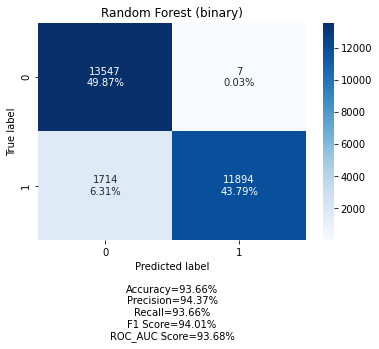

In [0]:
# RandomeForest Classifier after removing payer_code cols, medic_spec columns
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=100)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
cnf_rfc_b = confusion_matrix(y_val_b,pred_rfc_b)  
make_confusion_matrix(cnf_rfc_b,y_val_b,pred_rfc_b, title='Random Forest (binary)')
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')


RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.94      0.93      0.93     27162
weighted avg       0.94      0.93      0.93     27162

[[13552     2]
 [ 1780 11828]]
Accuracy of Model is 0.9343936381709742
Training score,RMSE of model is: (0.9358629328807532, 0.2532529706030055)
Test score,RMSE of is: (0.9343936381709742, 0.2561373885808666)


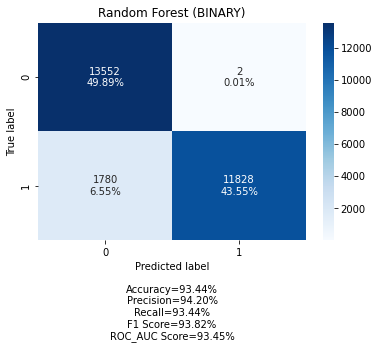

In [0]:
# To overcome overfitting, Random Forest with best params after removing Payer_code, medi_spec columns
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=600, max_features=7,
                             min_samples_leaf=8)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')

conf_rfc_b = confusion_matrix(y_val_b, pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_val_b,pred_rfc_b,title='Random Forest (BINARY)')

### **Checking roc_auc score with 5 folds cross validation to select best models** 

In [0]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [0]:
Name_per = []
Accuracy_per = []
model1=LogisticRegression(random_state=20,C=0.0001,max_iter=400)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=250)
model4=GradientBoostingClassifier(n_estimators=250)
model5=KNeighborsClassifier(n_neighbors=5 )
model6=DecisionTreeClassifier(max_depth=11)
model7=LinearDiscriminantAnalysis()
model8 = BaggingClassifier(n_estimators=300)
model9 = XGBClassifier(learning_rate=0.15)
model10 = SGDClassifier()
model11 = SVC(kernel='rbf')
model12 = MLPClassifier()

for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,model9,model10,model11,model12], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA','Bagging','XGBoost','SGD','SVC','MLPClassifier']):
    scores_per = cross_val_score(model, X_train_b, y_train_b, cv=5, scoring="roc_auc")
    Accuracy_per.append(scores_per.mean())
    Name_per.append(model.__class__.__name__)
    print("Accuracy of model %s is %f" % (label,scores_per.mean()))

Accuracy of model Logistic Regression is 0.644314
Accuracy of model Naive Bayes is 0.517454
Accuracy of model Random Forest is 0.958203
Accuracy of model Gradient Boosting is 0.957248
Accuracy of model KNN is 0.875343
Accuracy of model Decision Tree is 0.934971
Accuracy of model LDA is 0.694700
Accuracy of model Bagging is 0.954132
Accuracy of model XGBoost is 0.956470
Accuracy of model SGD is 0.681351


In [0]:
model1=LogisticRegression(random_state=20,C=0.0001,max_iter=400)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=250)
model4=GradientBoostingClassifier(n_estimators=250)
model5=KNeighborsClassifier(n_neighbors=5, )
model6=DecisionTreeClassifier(max_depth=11)
model7=LinearDiscriminantAnalysis()
model8 = BaggingClassifier(n_estimators=300)
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),('gb',model4),('knn',model5),
                                             ('dt',model6),('lda',model7), ('Bag',model8)], voting = 'soft')
scores_per_vote = cross_val_score(Ensembled_model, X_train_b, y_train_b, cv=5, scoring="accuracy")
Accuracy_per.append(scores_per_vote.mean())
print("Accuracy of Voting Classifier model is %f" % (scores_per_vote.mean()))

Accuracy of Voting Classifier model is 0.927458


### **Model 1: Random Forest Classifier**

RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.94     27162
   macro avg       0.94      0.94      0.94     27162
weighted avg       0.94      0.94      0.94     27162

[[13551     3]
 [ 1716 11892]]
Accuracy of Model is 0.9367130550033135
Training score,RMSE of model is: (0.9999919182123086, 0.002842848517145672)
Test score,RMSE of is: (0.9367130550033135, 0.2515689666804842)


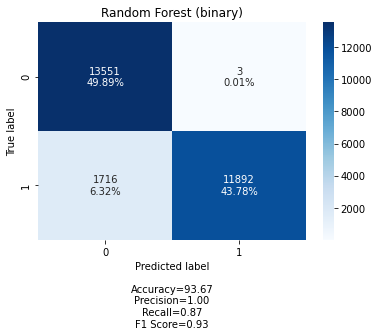

In [0]:
# RandomeForest Classifier 
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=100)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
cnf_rfc_b = confusion_matrix(y_val_b,pred_rfc_b)
make_confusion_matrix(cnf_rfc_b,y_val_b,pred_rfc_b, title='Random Forest (binary)')
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')


In [0]:
# Hyperparameter Tuning of model using GridSeacrhCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model_rfc_grid = RandomForestClassifier(random_state=123)
params = { 'max_features':np.arange(5,10),'n_estimators': [10, 20, 50, 100, 500, 1000],'min_samples_leaf': [10,50,100,200,500]}
g_search_rf = GridSearchCV(estimator=model_rfc_grid, param_grid=params, cv=5, scoring='accuracy')
g_search_rf.fit(X_train,y_train)
print(g_search_rf.best_params_)
res = g_search_rf.cv_results_
for i,j in zip(res['mean_test_score'], res['params']):
    print(i,j)

In [0]:
# Random Forest with best params:
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=800, max_features=9,
                             min_samples_leaf=20)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')



RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.94      0.93      0.93     27162
weighted avg       0.94      0.93      0.93     27162

[[13552     2]
 [ 1800 11808]]
Accuracy of Model is 0.9336573153670569
Training score,RMSE of model is: (0.9343354750070716, 0.2562509024236372)
Test score,RMSE of is: (0.9336573153670569, 0.25757073714407674)


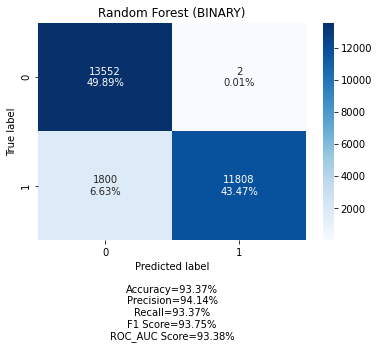

In [0]:
# Plotting of confusion Matrix
conf_rfc_b = confusion_matrix(y_val_b, pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_val_b,pred_rfc_b,title='Random Forest (BINARY)')

Top 15 features are: 
number_inpatient-cbrt
total_visits-cbrt
insulin
change_1
gender_1
num_procedures
diabetesMed_1
admission_source_id_7
race_Caucasian
metformin
diag_ch
total_num_procedures
admission_type_id_3
num_medications*num_procedures
discharge_disposition_id_3


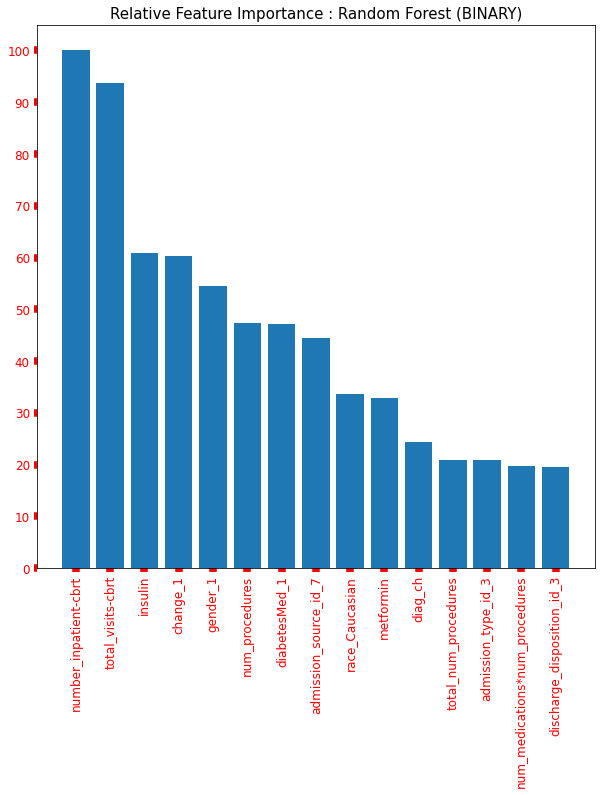

In [0]:
top = feature_importance(re_rfc_b,X_train_b,15,title='Random Forest (BINARY)')

RANDOM FOREST on test data:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13284
           1       1.00      0.87      0.93     13345

    accuracy                           0.93     26629
   macro avg       0.94      0.93      0.93     26629
weighted avg       0.94      0.93      0.93     26629

[[13282     2]
 [ 1775 11570]]
Accuracy of Model is 0.9332682413909648
Training score,RMSE of model is: (0.9343354750070716, 0.2562509024236372)
Test score,RMSE of is: (0.9332682413909648, 0.25832490899840704)


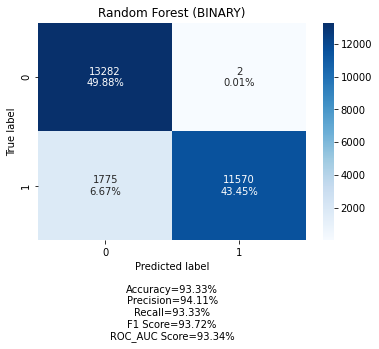

In [0]:
#Random Forest with best params: On final test Data
print('RANDOM FOREST on test data:')
pred_rfc_b = re_rfc_b.predict(X_test_b)
evaluate_model(y_test_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_rfc_b )}')

conf_rfc_b = confusion_matrix(y_test_b, pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_test_b,pred_rfc_b,title='Random Forest (BINARY)')

(123735, 15) (26629, 15) (27162, 15) (27162,) (123735,) (26629,)
RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.94      0.93      0.93     27162
weighted avg       0.94      0.93      0.93     27162

[[13552     2]
 [ 1784 11824]]
Accuracy of Model is 0.9342463736101907
Training score,RMSE of model is: (0.93427082070554, 0.25637702567597576)
Test score,RMSE of is: (0.9342463736101907, 0.25642469925849437)


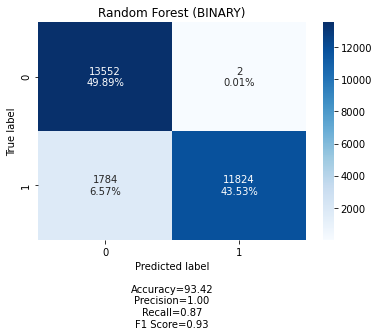

In [0]:
#TRAIN-TEST-VAL split (70%-15%-15%) - on top 15 features
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b[top], y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)

#Random Forest with best params:
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=500,
                             min_samples_leaf=10)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')

conf_rfc_b = confusion_matrix(y_val_b, pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_val_b,pred_rfc_b,title='Random Forest (BINARY)')

### **To improve accuracy of the model, implement feature selection Using Boruta Feature selection algorithm**

In [0]:
pip install boruta

In [0]:
#feature selection using boruta algorithm
from boruta import BorutaPy
X_b = X_sm_b.values
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 75, perc = 90)
boruta_feature_selector.fit(X_b, y_sm_b) 
X_boruta = boruta_feature_selector.transform(X_b)
X_boruta.shape
X_b = pd.DataFrame(X_b)
features = [f for f in X_sm_b.columns]
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

Iteration: 	1 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	2 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	3 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	4 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	5 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	6 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	7 / 75
Confirmed: 	0
Tentative: 	99
Rejected: 	0
Iteration: 	8 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	9 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	10 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	11 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	12 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	13 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	14 / 75
Confirmed: 	61
Tentative: 	10
Rejected: 	28
Iteration: 	15 / 75
Confirmed: 	61
Tentative: 	9
Rejected: 	29
Iteration: 	16 / 75
Confirmed: 	61
Tentative: 	9
Rejected: 	29
I

In [0]:
final_features = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient-cbrt', 'number_emergency-cbrt', 'number_inpatient-cbrt', 'number_diagnoses', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'total_visits-cbrt', 'diag_ch', 'num_medications_per_day', 'num_procedures_per_day', 'num_lab_procedures_per_day', 'number_diagnoses_per_day', 'total_num_medications-cbrt', 'total_num_procedures', 'total_num_lab_procedures', 'num_medications*num_procedures', 'num_medications*num_lab_procedures', 'num_medications*number_diagnoses', 'total_number_diagnoses', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_15', 'discharge_disposition_id_18', 'discharge_disposition_id_2', 'discharge_disposition_id_22', 'discharge_disposition_id_28', 'discharge_disposition_id_3', 'discharge_disposition_id_4', 'discharge_disposition_id_5', 'discharge_disposition_id_6', 'discharge_disposition_id_7', 'admission_source_id_4', 'admission_source_id_5', 'admission_source_id_6', 'admission_source_id_7', 'admission_source_id_9', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 'change_1', 'diabetesMed_1', 'A1Cresult_0', 'A1Cresult_1', 'max_glu_serum_0', 'max_glu_serum_1']

In [0]:
#TRAIN-TEST-VAL split (Using features of Boruta Algorithm)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b[final_features], y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)


(123735, 61) (26629, 61) (27162, 61) (27162,) (123735,) (26629,)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.94      0.93      0.93     27162
weighted avg       0.94      0.93      0.93     27162

[[13553     1]
 [ 1792 11816]]
Accuracy of Model is 0.9339886606288197
Training score,RMSE of model is: (0.9346345011516547, 0.25566677306279995)
Test score,RMSE of is: (0.9339886606288197, 0.2569267198466916)


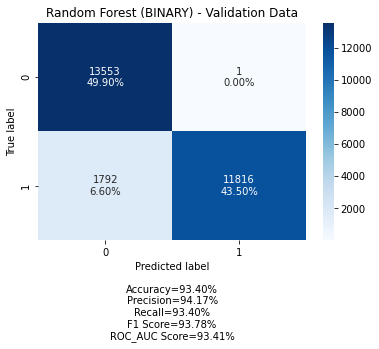

In [0]:
#TRAIN-TEST-VAL split (Using features of Boruta Algorithm)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm_b[final_features], y_sm_b, test_size=0.15, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.18, random_state=42)
print(X_train_b.shape, X_test_b.shape,X_val_b.shape, y_val_b.shape, y_train_b.shape, y_test_b.shape)

#Random Forest with best params:
print('RANDOM FOREST:')
re_rfc_b = RandomForestClassifier(n_estimators=800, max_features=7,
                             min_samples_leaf=20)
re_rfc_b.fit(X_train_b,y_train_b)
pred_rfc_b = re_rfc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_rfc_b)
print(f'Training score,RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test score,RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_rfc_b )}')

conf_rfc_b = confusion_matrix(y_val_b, pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_val_b,pred_rfc_b,title='Random Forest (BINARY) - Validation Data')

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13284
           1       1.00      0.87      0.93     13345

    accuracy                           0.93     26629
   macro avg       0.94      0.93      0.93     26629
weighted avg       0.94      0.93      0.93     26629

[[13283     1]
 [ 1766 11579]]
Accuracy of Model is 0.9336437718277066
Training RMSE of model is: (0.9346345011516547, 0.25566677306279995)
Test RMSE of is: (0.9336437718277066, 0.2575970267147767)


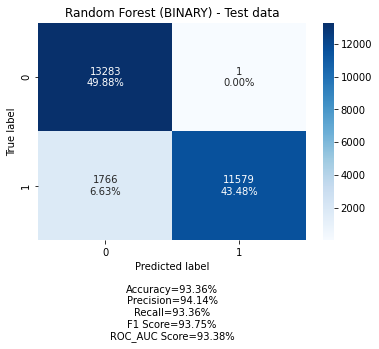

In [0]:
pred_rfc_b = re_rfc_b.predict(X_test_b)
evaluate_model(y_test_b,pred_rfc_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_rfc_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_rfc_b )}')
conf_rfc_b = confusion_matrix(y_test_b,pred_rfc_b)
make_confusion_matrix(conf_rfc_b,y_test_b,pred_rfc_b, title='Random Forest (BINARY) - Test data')

### **Model 2: Support Vector Machine**

In [0]:
# Support vector machine Classifier SVC
print('Support Vector Classifier:')
re_svc_b = SVC()
re_svc_b.fit(X_train_b,y_train_b)
pred_svc_b = re_svc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_svc_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_svc_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_svc_b )}')
conf_svc_b = confusion_matrix(y_val_b,pred_svc_b)
make_confusion_matrix(conf_svc_b,y_val_b,pred_svc_b)

In [0]:
X_sm_b = X_sm_b.iloc[:,1:]
y_sm_b = y_sm_b.iloc[:,1:]
y_sm_b = y_sm_b.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_sm_b, y_sm_b, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=42)
print(X_train.shape, X_test.shape,X_val.shape, y_val.shape, y_train.shape, y_test.shape)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 100, 1000, 10000], 'gamma': [0.1,0.01,0.15],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose=2,cv=3)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
svc_pred = grid.predict(X_val)
evaluate_model(y_val,svc_pred)

(123735, 131) (26629, 131) (27162, 131) (27162,) (123735,) (26629,)
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=10, gamma=0.1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=10, gamma=0.1, kernel=rbf, total=129.7min
[CV] C=10, gamma=0.1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 129.7min remaining:    0.0s


[CV] ..................... C=10, gamma=0.1, kernel=rbf, total=133.7min
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ..................... C=10, gamma=0.1, kernel=rbf, total=143.1min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=39.9min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=37.8min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=36.0min
[CV] C=10, gamma=0.15, kernel=rbf ....................................
[CV] .................... C=10, gamma=0.15, kernel=rbf, total=145.7min
[CV] C=10, gamma=0.15, kernel=rbf ....................................


In [0]:
evaluate_model(y_val,pred_svc)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train,y_train,re_svc)}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val, y_val,re_svc)}')

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     13554
           1       0.91      0.94      0.93     13608

    accuracy                           0.93     27162
   macro avg       0.93      0.93      0.93     27162
weighted avg       0.93      0.93      0.93     27162

[[12328  1226]
 [  775 12833]]
Accuracy of Model is 0.9263309034680804


In [0]:
# Code for hyperparameter tuning using GridsearchCV

In [0]:
# Support vector machine Classifier SVC
print('Support Vector Classifier:')
re_svc_b = SVC(kernel='rbf', gamma=0.15, C=10000)
re_svc_b.fit(X_train_b,y_train_b)
pred_svc_b = re_clf_b.predict(X_val_b)
evaluate_model(y_val_b,pred_svc_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_clf_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_clf_b )}')
conf_svc_b = confusion_matrix(y_val_b,pred_svc_b)
make_confusion_matrix(conf_svc_b,y_val_b,pred_svc_b)
  

Support Vector Classifier:


In [0]:
pred_svc_b = re_clf_b.predict(X_test_b)
evaluate_model(y_test_b,pred_svc_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_clf_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_clf_b )}')
conf_svc_b = confusion_matrix(y_test_b,pred_svc_b)
make_confusion_matrix(conf_svc_b,y_test_b,pred_svc_b)

### **Model 3: XGBoost Classifier**

XGBoost classifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13554
           1       1.00      0.87      0.93     13608

    accuracy                           0.94     27162
   macro avg       0.94      0.94      0.94     27162
weighted avg       0.94      0.94      0.94     27162

[[13552     2]
 [ 1751 11857]]
Accuracy of Model is 0.9354613062366541
Training RMSE of model is: (0.9348688729947064, 0.25520800732989074)
Test RMSE of is: (0.9354613062366541, 0.2540446688347265)


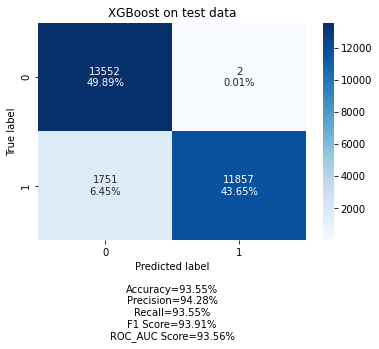

In [0]:
# XGboost ()
print('XGBoost classifier')
from xgboost import XGBClassifier
re_xgb_b = XGBClassifier()
re_xgb_b.fit(X_train_b,y_train_b)
pred_xgb_b = re_xgb_b.predict(X_val_b)
evaluate_model(y_val_b,pred_xgb_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_xgb_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_xgb_b )}')
conf_xgb_b = confusion_matrix(y_val_b,pred_xgb_b)
make_confusion_matrix(conf_xgb_b,y_val_b,pred_xgb_b,title="XGBoost on test data")

XGBoost classifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13554
           1       1.00      0.88      0.93     13608

    accuracy                           0.94     27162
   macro avg       0.94      0.94      0.94     27162
weighted avg       0.94      0.94      0.94     27162

[[13518    36]
 [ 1689 11919]]
Accuracy of Model is 0.9364921581621383
Training RMSE of model is: (0.9378025619266982, 0.2493941420188169)
Test RMSE of is: (0.9364921581621383, 0.2520076225788849)


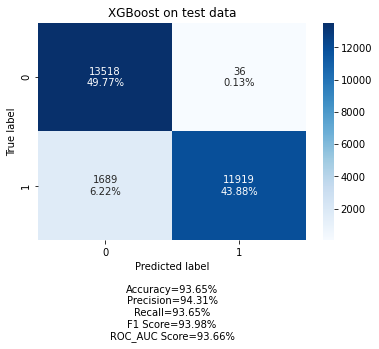

In [0]:
# XGboost with best params
print('XGBoost classifier')
from xgboost import XGBClassifier
re_xgb_b = XGBClassifier(n_estimators=600, learning_rate = 0.15)
re_xgb_b.fit(X_train_b,y_train_b)
pred_xgb_b = re_xgb_b.predict(X_val_b)
evaluate_model(y_val_b,pred_xgb_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_xgb_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_xgb_b )}')
conf_xgb_b = confusion_matrix(y_val_b,pred_xgb_b)
make_confusion_matrix(conf_xgb_b,y_val_b,pred_xgb_b,title="XGBoost on validation data")

Top 15 features are: 
gender_1
change_1
number_inpatient-cbrt
metformin
admission_source_id_7
insulin
diabetesMed_1
discharge_disposition_id_3
race_Caucasian
diag_ch
time_in_hospital
num_procedures
number_diagnoses_per_day
admission_type_id_2
total_visits-cbrt


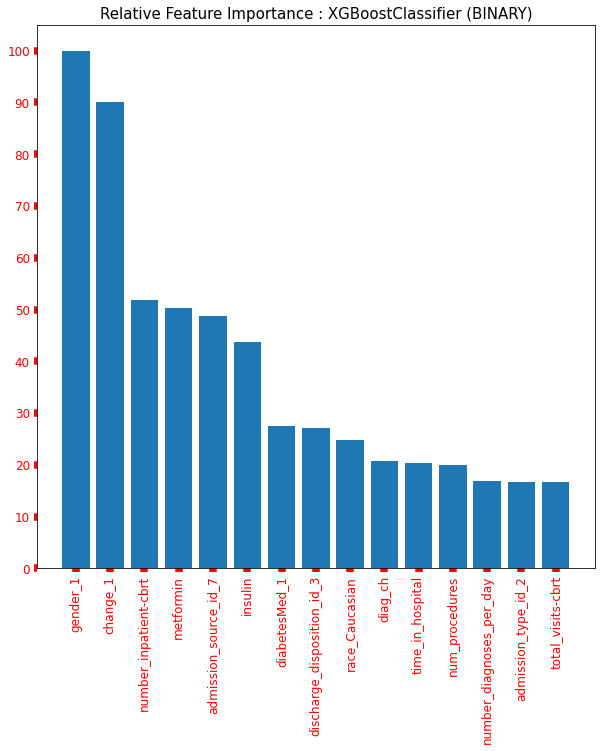

In [0]:
top_xgb = feature_importance(re_xgb_b, X_train_b,15,title='XGBoostClassifier (BINARY)')

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13284
           1       1.00      0.87      0.93     13345

    accuracy                           0.94     26629
   macro avg       0.94      0.94      0.93     26629
weighted avg       0.94      0.94      0.93     26629

[[13282     2]
 [ 1723 11622]]
Accuracy of Model is 0.9352209996620227
Training RMSE of model is: (0.9348850365700893, 0.25517633791147387)
Test RMSE of is: (0.9352209996620227, 0.2545171906531608)


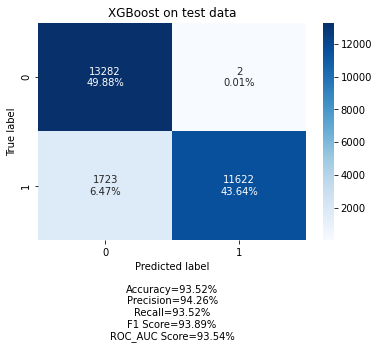

In [0]:
# XGBoost on test data
pred_xgb_b = re_xgb_b.predict(X_test_b)
evaluate_model(y_test_b,pred_xgb_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_xgb_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_xgb_b )}')
conf_xgb_b = confusion_matrix(y_test_b,pred_xgb_b)
make_confusion_matrix(conf_xgb_b,y_test_b,pred_xgb_b,title="XGBoost on test data")

### **Model 4: KNN**

KNN :
              precision    recall  f1-score   support

           0       0.80      0.79      0.79     13554
           1       0.79      0.80      0.80     13608

    accuracy                           0.80     27162
   macro avg       0.80      0.80      0.80     27162
weighted avg       0.80      0.80      0.80     27162

[[10722  2832]
 [ 2728 10880]]
Accuracy of Model is 0.795302260511008
Training RMSE of model is: (0.8398432133187861, 0.40019593536318415)
Test RMSE of is: (0.795302260511008, 0.4524353428822642)


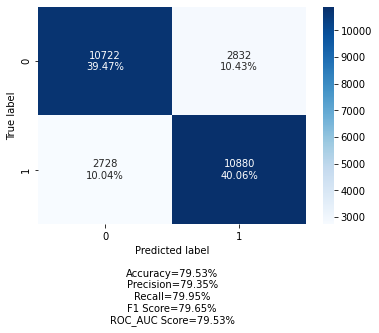

In [0]:
# KNN
print('KNN :')
from sklearn.neighbors import KNeighborsClassifier
re_knn_b = KNeighborsClassifier(n_neighbors=10)
re_knn_b.fit(X_train_b,y_train_b)
pred_knn_b = re_knn_b.predict(X_val_b)
evaluate_model(y_val_b,pred_knn_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_knn_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_knn_b )}')
conf_knn = confusion_matrix(y_val_b, pred_knn_b)
make_confusion_matrix(conf_knn,y_val_b,pred_knn_b)

In [0]:
# KNN Hyperparameter Tuning
grid_params = {
  'n_neighbors' : [3,5,11,19,25],
  'weights' : ['uniform', 'distance'],
  'metric' : ['euclidean', 'manhattan']
  }

gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)
gs_knn_results =  gs_knn.fit(X_train_b, y_train_b)
print(gs_knn_results.best_estimator_)
print(gs_knn_results.best_score_)
print(gs_knn_results.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 119.8min finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
0.8806481593728533
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


KNN :
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     13554
           1       0.91      0.93      0.92     13608

    accuracy                           0.92     27162
   macro avg       0.92      0.92      0.92     27162
weighted avg       0.92      0.92      0.92     27162

[[12364  1190]
 [  936 12672]]
Accuracy of Model is 0.9217288859435977
Training RMSE of model is: (1.0, 0.0)
Test RMSE of is: (0.9217288859435977, 0.2797697518610658)


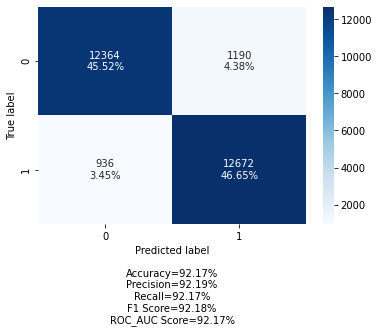

In [0]:
#KNN with best params
print('KNN :')
from sklearn.neighbors import KNeighborsClassifier
re_knn_b = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
re_knn_b.fit(X_train_b,y_train_b)
pred_knn_b = re_knn_b.predict(X_val_b)
evaluate_model(y_val_b,pred_knn_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_knn_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_knn_b )}')
conf_knn = confusion_matrix(y_val_b, pred_knn_b)
make_confusion_matrix(conf_knn,y_val_b,pred_knn_b)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     13284
           1       0.91      0.92      0.92     13345

    accuracy                           0.92     26629
   macro avg       0.92      0.92      0.92     26629
weighted avg       0.92      0.92      0.92     26629

[[12074  1210]
 [ 1010 12335]]
Accuracy of Model is 0.9166322430432987
Training RMSE of model is: (1.0, 0.0)
Test RMSE of is: (0.9166322430432987, 0.2887347519033712)


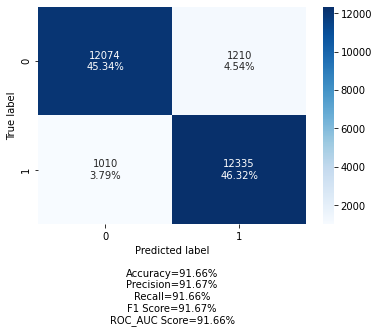

In [0]:
pred_knn_b = re_knn_b.predict(X_test_b)
evaluate_model(y_test_b,pred_knn_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_knn_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_knn_b )}')
conf_knn = confusion_matrix(y_test_b, pred_knn_b)
make_confusion_matrix(conf_knn,y_test_b,pred_knn_b)

### **Model 5: Decision Tree Classifier**

Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     13554
           1       0.87      0.89      0.88     13608

    accuracy                           0.88     27162
   macro avg       0.88      0.88      0.88     27162
weighted avg       0.88      0.88      0.88     27162

[[11738  1816]
 [ 1480 12128]]
Accuracy of Model is 0.8786540019144393
Training RMSE of model is: (1.0, 0.0)
Test RMSE of is: (0.8786540019144393, 0.34834752487359616)


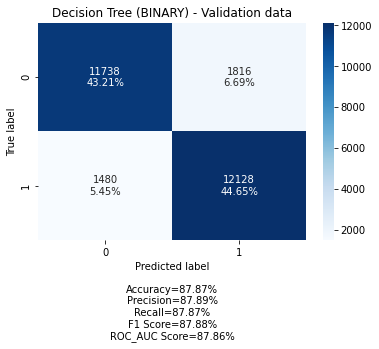

In [0]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree classifier:')
re_dec = DecisionTreeClassifier()
re_dec.fit(X_train_b,y_train_b)
pred_dec_b = re_dec.predict(X_val_b)
evaluate_model(y_val_b,pred_dec_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_dec )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_dec )}')
conf_dec_b = confusion_matrix(y_val_b, pred_dec_b)
make_confusion_matrix(conf_dec_b,y_val_b,pred_dec_b, title = 'Decision Tree (BINARY) - Validation data')

In [0]:
#hypertuning Decision tree classifier
grid_params_dec = {
  'max_depth' : [3,5,11,19],
  'criterion' : ['gini', 'entropy'],
  'min_samples_leaf' : [1,3,5,7,9]
  }

gs_knn = GridSearchCV(DecisionTreeClassifier(), grid_params_dec, verbose=1, cv=3, n_jobs=-1)
gs_knn_results =  gs_knn.fit(X_train_b, y_train_b)
print(gs_knn_results.best_estimator_)
print(gs_knn_results.best_score_)
print(gs_knn_results.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.1min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.912926819412454
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 5}


Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     13554
           1       0.98      0.84      0.91     13608

    accuracy                           0.91     27162
   macro avg       0.92      0.91      0.91     27162
weighted avg       0.92      0.91      0.91     27162

[[13377   177]
 [ 2155 11453]]
Accuracy of Model is 0.9141447610632502
Training RMSE of model is: (0.9170889400735442, 0.28794280669337047)
Test RMSE of is: (0.9141447610632502, 0.29301064645631886)


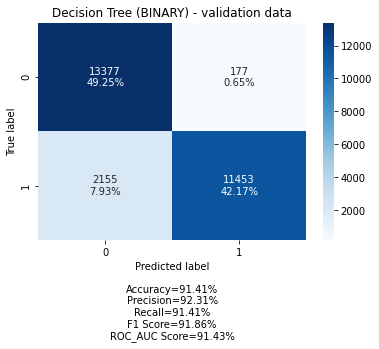

In [0]:
# Decision tree classifier with best params
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree classifier:')
re_dec = DecisionTreeClassifier(criterion='gini', max_depth=11, 
                                min_samples_leaf=5)
re_dec.fit(X_train_b,y_train_b)
pred_dec = re_dec.predict(X_val_b)
evaluate_model(y_val_b,pred_dec)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_dec )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_dec )}')
conf_dec = confusion_matrix(y_val_b, pred_dec)
make_confusion_matrix(conf_dec,y_val_b,pred_dec, title='Decision Tree (BINARY) - validation data')

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13284
           1       0.98      0.84      0.91     13345

    accuracy                           0.91     26629
   macro avg       0.92      0.91      0.91     26629
weighted avg       0.92      0.91      0.91     26629

[[13074   210]
 [ 2105 11240]]
Accuracy of Model is 0.9130647038942507
Training RMSE of model is: (0.9170889400735442, 0.28794280669337047)
Test RMSE of is: (0.9130647038942507, 0.29484792030087204)


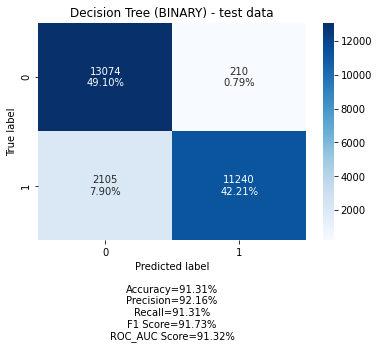

In [0]:
pred_dec_b = re_dec.predict(X_test_b)
evaluate_model(y_test_b,pred_dec_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_dec )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_dec )}')
conf_dec_b = confusion_matrix(y_test_b, pred_dec_b)
make_confusion_matrix(conf_dec_b,y_test_b,pred_dec_b, title = 'Decision Tree (BINARY) - test data')

### **Model 6: MLPClassifier**

MLPClassifier
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     13554
           1       0.91      0.88      0.89     13608

    accuracy                           0.90     27162
   macro avg       0.90      0.90      0.90     27162
weighted avg       0.90      0.90      0.90     27162

[[12396  1158]
 [ 1656 11952]]
Accuracy of Model is 0.8963993814888447
Training RMSE of model is: (0.9560997292601123, 0.20952391448206495)
Test RMSE of is: (0.8963993814888447, 0.3218704995975172)


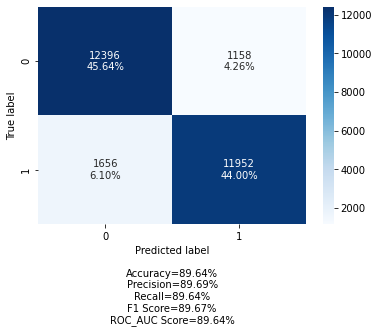

In [0]:
# MLPClassifier
print('MLPClassifier')
re_mlpc_b = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=600)
re_mlpc_b.fit(X_train_b,y_train_b)
pred_mlpc_b = re_mlpc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_mlpc_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_mlpc_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_mlpc_b )}')
conf_mlp = confusion_matrix(y_val_b, pred_mlpc_b)
make_confusion_matrix(conf_mlp,y_val_b,pred_mlpc_b)

In [0]:
# hyperpramater tuning MLPClassifier
print('MLPCLASSIFIER with hyper parameter tuning')
mlp = MLPClassifier(max_iter=200)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(100,100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf_mlp.fit(X_train_b, y_train_b)

print('Best parameters found:\n', clf_mlp.best_params_)
print(clf_mlp.best_estimator_)
print(clf_mlp.best_score_)
# # All results
# means = clf_mlp.cv_results_['mean_test_score']
# stds = clf_mlp.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf_mlp.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

MLPCLASSIFIER with hyper parameter tuning


KeyboardInterrupt: ignored

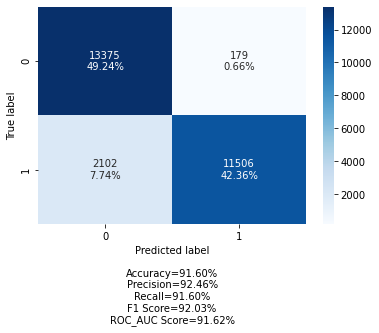

In [0]:
# MLPClassifier with params
print('MLPClassifier')
re_mlpc_b = MLPClassifier(hidden_layer_sizes=(100,),activation='tanh',alpha=0.0001,learning_rate='constant',solver='adam')
re_mlpc_b.fit(X_train_b,y_train_b)
pred_mlpc_b = re_mlpc_b.predict(X_val_b)
evaluate_model(y_val_b,pred_mlpc_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_mlpc_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_mlpc_b )}')
conf_mlp = confusion_matrix(y_val_b, pred_mlpc_b)
make_confusion_matrix(conf_mlp,y_val_b,pred_mlpc_b)

In [0]:
import pickle
with open("/content/drive/My Drive/model_mlp.pkl", 'wb') as file:
    pickle.dump(re_mlpc_b, file)

### **Model 7: GradientBoosting Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13554
           1       0.99      0.88      0.93     13608

    accuracy                           0.94     27162
   macro avg       0.94      0.94      0.94     27162
weighted avg       0.94      0.94      0.94     27162

[[13493    61]
 [ 1663 11945]]
Accuracy of Model is 0.9365289743023342
Training RMSE of model is: (0.9438800662706591, 0.23689646204479486)
Test RMSE of is: (0.9365289743023342, 0.25193456630177974)


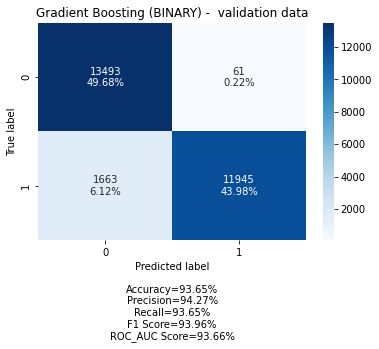

In [0]:
# GradientBoosting Classifier on validation data
print("GradientBoosting Classifier")
re_grd_b = GradientBoostingClassifier(max_depth=5, n_estimators=500)
re_grd_b.fit(X_train_b,y_train_b)
pred_grd_b = re_grd_b.predict(X_val_b)
evaluate_model(y_val_b,pred_grd_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_grd_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_grd_b )}')
conf_grd_b = confusion_matrix(y_val_b,pred_grd_b)
make_confusion_matrix(conf_grd_b,y_val_b,pred_grd_b, title='Gradient Boosting (BINARY) -  validation data')

GradientBoosting Classifier
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     13284
           1       0.99      0.88      0.93     13345

    accuracy                           0.94     26629
   macro avg       0.94      0.94      0.94     26629
weighted avg       0.94      0.94      0.94     26629

[[13213    71]
 [ 1642 11703]]
Accuracy of Model is 0.9356716361861129
Training RMSE of model is: (0.9438800662706591, 0.23689646204479486)
Test RMSE of is: (0.9356716361861129, 0.25363036847721354)


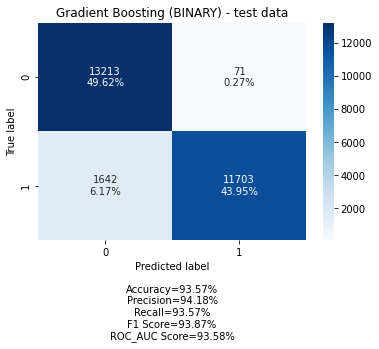

In [0]:
# GradientBoosting Classifier on test data
print("GradientBoosting Classifier")
pred_grd_b = re_grd_b.predict(X_test_b)
evaluate_model(y_test_b,pred_grd_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_grd_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_grd_b )}')
conf_grd_b = confusion_matrix(y_test_b,pred_grd_b)
make_confusion_matrix(conf_grd_b,y_test_b,pred_grd_b, title='Gradient Boosting (BINARY) - test data')

### **Model 8: SGD Classifier**

SGD Classifier
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     13554
           1       0.59      0.60      0.60     13608

    accuracy                           0.59     27162
   macro avg       0.59      0.59      0.59     27162
weighted avg       0.59      0.59      0.59     27162

[[7863 5691]
 [5384 8224]]
Accuracy of Model is 0.5922612473308299
Training RMSE of model is: (0.5889845233765709, 0.641104887380707)
Test RMSE of is: (0.5922612473308299, 0.638544244879844)


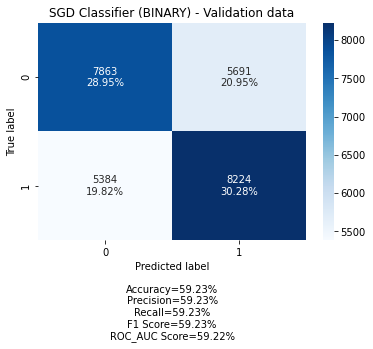

In [0]:
from sklearn.linear_model import SGDClassifier
# SGD Classifier on validation data
print("SGD Classifier")
re_sgd_b = SGDClassifier(alpha=0.1,max_iter=1500,n_jobs=-1)
re_sgd_b.fit(X_train_b,y_train_b)
pred_sgd_b = re_sgd_b.predict(X_val_b)
evaluate_model(y_val_b,pred_sgd_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_sgd_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_val_b, y_val_b,re_sgd_b )}')
conf_grd_b = confusion_matrix(y_val_b,pred_sgd_b)
make_confusion_matrix(conf_grd_b,y_val_b,pred_sgd_b, title = 'SGD Classifier (BINARY) - Validation data')

SGD Classifier on test data
              precision    recall  f1-score   support

           0       0.59      0.57      0.58     13284
           1       0.58      0.60      0.59     13345

    accuracy                           0.58     26629
   macro avg       0.58      0.58      0.58     26629
weighted avg       0.58      0.58      0.58     26629

[[7543 5741]
 [5344 8001]]
Accuracy of Model is 0.5837245108716062
Training RMSE of model is: (0.5889845233765709, 0.641104887380707)
Test RMSE of is: (0.5837245108716062, 0.6451941483990643)


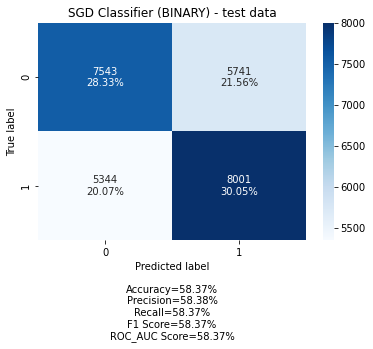

In [0]:
# SGD Classifier on test data
print("SGD Classifier on test data")
pred_sgd_b = re_sgd_b.predict(X_test_b)
evaluate_model(y_test_b,pred_sgd_b)
print(f'Training RMSE of model is: {calc_training_RMSE(X_train_b, y_train_b,re_sgd_b )}')
print(f'Test RMSE of is: {calc_test_RMSE(X_test_b, y_test_b,re_sgd_b )}')
conf_grd_b = confusion_matrix(y_test_b,pred_sgd_b)
make_confusion_matrix(conf_grd_b,y_test_b,pred_sgd_b, title = 'SGD Classifier (BINARY) - test data')

### **Model : Keras Sequential**

In [0]:
# keras sequential

# approach -1
model = Sequential()
model.add(Dense(512, input_shape=(X_train_b.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs =100
batch_size = 128
history = model.fit(X_train_b, y_train_b,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_split=0.2)
#print('Test accuracy:', acc)
predictions = model.predict(X_val_b)
accuracy = accuracy_score(y_val_b, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               31744     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [0]:
# approach -2 (Early Stopping)
print('keras-tensorflow')
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# define baseline model

model = Sequential()
model.add(Dense(512, input_dim=X_train_b.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2,activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_dum = to_categorical(y_train_b) 
y_val_dum = to_categorical(y_val_b) 
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')  
model.fit(X_train_b, y_train_dum, validation_data=(X_val_b,y_val_dum), callbacks=[monitor], verbose=2, epochs=1000)  
#score, acc = model.evaluate(X_val_b, y_val_dum,
#                       batch_size=128, verbose=2)

#print('Test accuracy:', acc)
predictions = model.predict(X_val_b)
accuracy = accuracy_score(y_val_b, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

keras-tensorflow
Train on 123735 samples, validate on 27162 samples
Epoch 1/1000
 - 22s - loss: 0.5140 - val_loss: 0.4217
Epoch 2/1000
 - 22s - loss: 0.3649 - val_loss: 0.3162
Epoch 3/1000
 - 22s - loss: 0.3185 - val_loss: 0.3188
Epoch 4/1000
 - 21s - loss: 0.2955 - val_loss: 0.2806
Epoch 5/1000
 - 21s - loss: 0.2821 - val_loss: 0.2869
Epoch 6/1000
 - 21s - loss: 0.2734 - val_loss: 0.2843
Epoch 00006: early stopping
Accuracy: 87.68


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13284
           1       0.98      0.84      0.91     13345

    accuracy                           0.91     26629
   macro avg       0.92      0.91      0.91     26629
weighted avg       0.92      0.91      0.91     26629



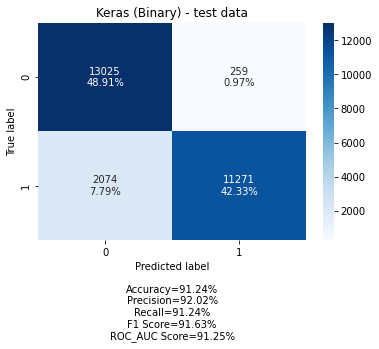

In [0]:
predictions = model.predict(X_test_b)
prediction = np.argmax(predictions, axis=1)
conf_cnn= confusion_matrix(y_test_b,prediction)
print(classification_report(y_test_b,prediction))
make_confusion_matrix(conf_cnn,y_test_b,prediction, title = 'Keras (Binary) - test data')

In [0]:
import pickle
with open("/content/drive/My Drive/model_keras_b.pkl", 'wb') as file:
    pickle.dump(model, file)

### **Model 9: CNN**

In [0]:
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
X_train_cnn = np.expand_dims(X_train_b, axis=2)
X_val_cnn = np.expand_dims(X_val_b,axis=2)

In [0]:
model_cnn =  Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, input_shape=(X_train_b.shape[1],1), activation='relu'))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())

model_cnn.add(Dense(512,activation='relu',use_bias=True))
model_cnn.add(Dense(2,activation='softmax',use_bias=True))
y_train_dum = to_categorical(y_train_b) 
y_val_dum = to_categorical(y_val_b) 
y_test_dum = to_categorical(y_test_b)
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=0.003, patience=5, verbose=1, mode='auto')
checkpt = ModelCheckpoint(filepath='.best_weights.hdf5', verbose=0, save_best_only=True)
model_cnn.fit(X_train_cnn,y_train_b, validation_data=(X_val_cnn,y_val_b), callbacks=[monitor,checkpt], verbose =2,epochs=100)

# with open("/content/drive/My Drive/model_cnn_b.pkl", 'wb') as file:
#     pickle.dump(model_cnn, file)
# model_cnn.load_weights('.best_weights.hdf5')

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 59, 64)            256       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 57, 64)            12352     
_________________________________________________________________
dropout_3 (Dropout)          (None, 57, 64)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 28, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               918016    
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [0]:
X_test_cnn = np.expand_dims(X_test_b, axis=2)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     13284
           1       1.00      0.87      0.93     13345

    accuracy                           0.93     26629
   macro avg       0.94      0.93      0.93     26629
weighted avg       0.94      0.93      0.93     26629



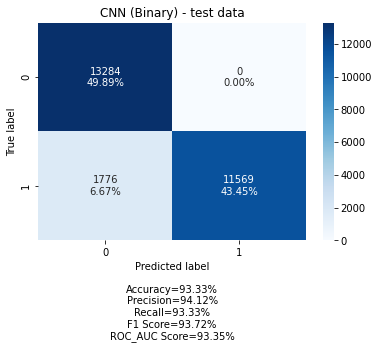

In [0]:
predictions_cnn = model_cnn.predict(X_test_cnn)
prediction = np.argmax(predictions_cnn, axis=1)
conf_cnn= confusion_matrix(y_test_b,prediction)
print(classification_report(y_test_b,prediction))
make_confusion_matrix(conf_cnn,y_test_b,prediction, title = 'CNN (Binary) - test data')